# **OVERFITTING AND PRUNING**

The first part of the assignment will focus on overfitting and the second part will focus on pruning.

Overfitting is a condition when your model fits your training data too well including the noisy labels. Therefore it fails to generalise and its performance on the test set decreases.

Pruning is one method to overcome overfitting in Decision Trees. We will essentially look at one way of pruning.


## IMPORTING THE PACKAGES

The important packages have been imported for you.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_breast_cancer, load_diabetes
from sklearn.model_selection import train_test_split
import json

ans = [0]*8

## LOADING THE DATASET

We will load the dataset into the dataset variable. It is a diabetes dataset, a regression problem.

There are 11 features (numerical). They include measurements like bmi, sugar level etc. The column names have been set as Feature1, Feature2 etc for ease.

The target variable(numerical) is a quantitative measure of how much the disease has progressed. 

In [2]:
# LOADING THE DATASET USING SKLEARN.
# THE CODE HAS BEEN WRITTEN FOR YOU. DO NOT MAKE ANY CHANGES.

data, label = load_diabetes(return_X_y = True)                    #loading the dataset
cols = ["Feature"+str(i) for i in range(1, 11)] 
dataset = pd.DataFrame(np.concatenate((data, label.reshape(-1, 1)), axis = 1), columns = cols + ["Target"])
print("Shape of Dataset : ", dataset.shape, "\n")
dataset.head()

Shape of Dataset :  (442, 11) 



,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## DIVIDING THE DATASET INTO TRAIN AND TEST SET

You need to divide the dataset into train and test set using sklearn's train_test_split(x, y, random_state = 15, test_size = x) function. x is the fraction of examples to be alloted to the test set.

You need to divide the dataset in 8:2 ratio (train:test size).

**NOTE**: Remember to keep random_state = 15 (produces consistent results for evaluation purposes).

In [3]:
# DIVIDE THE DATASET INTO TRAIN AND TEST SET

# START YOUR CODE HERE:
X_train, X_test, y_train,y_test = train_test_split(data, label, random_state = 15, test_size = 0.2)  




# END YOUR CODE HERE

## **QUESTIONS**
## **OVERFITTING**

It is when your model is too complex and fits the noisy parts of your training data. Therefore it fails to generalize and achieves a bad result on the test set.

### **QUESTION 1**: Fit a Decision Tree Classifier with max_depth = 1 on the training dataset. Assign the train set mean squared error to ans[0] and the test set mean squared error to ans[1]. (1 mark)



In [4]:
# SOME PART OF THE CODE HAS BEEN WRITTEN FOR YOU

dt1 = DecisionTreeRegressor(max_depth = 1, random_state = 20)    # The decision tree model you need to use. Don't change parameters.

# START YOUR CODE HERE:
dt1.fit(X_train, y_train)
y_pred_train1 = dt1.predict(X_train)
y_pred_test1 = dt1.predict(X_test)


# END YOUR CODE HERE

In [5]:
# SUBSTITUTE YOUR ANSWER IN PLACE OF None

ans[0] = mean_squared_error(y_train, y_pred_train1)
ans[1] = mean_squared_error(y_test, y_pred_test1)

### **QUESTION 2**: Fit a Decision Tree Classifier with max_depth = 2 on the training dataset. Assign the train set mean squared error to ans[2] and the test set mean squared error to ans[3]. (2 marks)

In [6]:
# SOME PART OF THE CODE HAS BEEN WRITTEN FOR YOU

dt4 = DecisionTreeRegressor(max_depth = 2, random_state = 20)        # The decision tree model you need to use. Don't change parameters.

# START YOUR CODE HERE:

dt4.fit(X_train, y_train)
y_pred_train4 = dt4.predict(X_train)
y_pred_test4 = dt4.predict(X_test)

# END YOUR CODE HERE

In [7]:
# SUBSTITUTE YOUR ANSWER IN PLACE OF None

ans[2] = mean_squared_error(y_train, y_pred_train4)
ans[3] = mean_squared_error(y_test, y_pred_test4)

Did the accuracy for test set go down?

### **QUESTION 3**: Fit a Decision Tree Classifier with max_depth = 5 on the training dataset. Assign the train set accuracy to ans[4] and the test set accuracy to ans[5]. (2 marks)

In [8]:
# SOME PART OF THE CODE HAS BEEN WRITTEN FOR YOU

dt5 = DecisionTreeRegressor( max_depth = 5, random_state = 20)      # The decision tree that you need to use. Don't change parameters.

# START YOUR CODE HERE:

dt5.fit(X_train, y_train)
y_pred_train5 = dt5.predict(X_train)
y_pred_test5 = dt5.predict(X_test)

# END YOUR CODE HERE

In [9]:
# SUBSTITUTE YOUR ANSWER IN PLACE OF None

ans[4] = mean_squared_error(y_train, y_pred_train5)
ans[5] = mean_squared_error(y_test, y_pred_test5)

Did the accuracy of the test set go down again? If not then why? Is overfitting the reason?

### **PLOTTING TRAIN AND TEST ACCURACY VS DEPTH OF TREES**

Let's try to plot the train and test accuracy vs max_depth.
Some part of the code has been written for you.

### **QUESTION 4**: Fit a Decision Tree Classifier with max_depth = d where d varies from 1-6 (both inclusive) on the training dataset. Assign the depth for which the test mean squared error is least, to ans[6]. (2 marks)

In [10]:
# SOME OF THE CODE HAS BEEN WRITTEN FOR YOU

depth = [1, 2, 3, 4, 5, 6]                               # List containing depth of decision tree.
train_mse = []                           # Train accuracy of corresponding tree.
test_mse = []                            # Test accuracy of corresponding tree.

# Dont forget to set random_state = 10 for your decision tree model.
  

# START YOUR CODE HERE:

for i in depth:
    dti = DecisionTreeRegressor(max_depth = i, random_state = 10)
    dti.fit(X_train, y_train)
    y_pred_traini = dti.predict(X_train)
    y_pred_testi = dti.predict(X_test)
    train_mse.append(mean_squared_error(y_train, y_pred_traini))
    test_mse.append(mean_squared_error(y_test, y_pred_testi))
  


# END YOUR CODE HERE

print(train_mse, test_mse)


[4327.119510681643, 3459.000928662067, 3025.1082715438256, 2570.7108121273777, 2140.8850843411747, 1708.7421808534555] [3974.3411198764256, 3522.558075122498, 3817.4835398314735, 3694.4088541532747, 3976.7113973341216, 4483.324748602513]


In [11]:
# SUBSTITUTE YOUR ANSWER IN PLACE OF None

ans[6] = depth[np.argmin(np.array(test_mse))]


### PLOTTING MEAN SQUARED ERROR VS THE DEPTH OF THE TREE

You can try to plot the train mean squared error and the test mean squared error vs the depth of the tree for gaining a better insight.

Some part of the matplotlib code has been written for you.

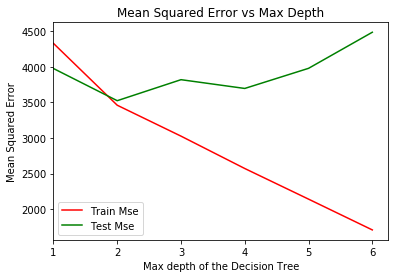

In [12]:
plt.plot(depth, train_mse, c = "r", label = "Train Mse")
plt.plot(depth, test_mse, c = "g", label = "Test Mse")
plt.legend()
plt.xlim(1)
plt.xticks(ticks = [i for i in range(1, 7)])
plt.title("Mean Squared Error vs Max Depth")
plt.xlabel("Max depth of the Decision Tree")
plt.ylabel("Mean Squared Error")
plt.show()

## **PRUNING**

We will look at one way to prune a decision tree.

## USING SKLEARN'S INBUILT PRUNING ALGORITHM
We will use a inbuilt parameter in the sklearn Decision Tree Regressor model called ccp_alpha to prune the Decision Trees formed.

**Minimal Cost Complexity Pruning**: One of the types of pruning in Decision Trees. 

It utilises a complexity parameter **alpha** (alpha > 0). It is used to define a cost complexity measure of a tree as:-

$R_{alpha}(T) = R(T) + alpha*|T|$ where |T| are the number of terminal nodes in the tree, R(T) is the misclassification rate of the terminal nodes (a mean squared error type of quantity for regression and accuracy type of quantity for classification).

R(T) as you must have noticed always favours bigger trees as their misclassification rate would be always lower (remember we are talking about training set misclassification rate). So to penalise the bigger ones alpha*|T| term is added as it would favour a smaller tree.

alpha is what we call a hyperparameter. We need to find the best values of alpha to decrease the test set mean squared error.



### **QUESTION 5**: For which values of alpha (a) 10 (b) 50 (c) 100 (d) 200 is the test mean squared error the lowest? (We will use a tree with max_depth = 4). Assign your answer (the value of alpha and not the option) to ans[7]. (3 marks)
 

In [13]:
# SOME OF THE MATPLOTLIB CODE HAS BEEN WRITTEN FOR YOU

train_mse = []                           # Train accuracy of corresponding tree.
test_mse = []                            # Test accuracy of corresponding tree.
alphas = [10, 50, 100, 200]

# KEEP ALL PARAMETERS OTHER THAN ccp_alpha the same. REPLACE None WITH THE GIVEN VALUES OF ALPHA BEFORE FITTING ON THE TRAIN SET.
#dt_temp = DecisionTreeRegressor(max_depth = 4, random_state = 10, ccp_alpha = None)

# START YOUR CODE HERE

for i in alphas:
    dt_temp = DecisionTreeRegressor(max_depth = 4, random_state = 10, ccp_alpha = i)
    dt_temp.fit(X_train, y_train)
    y_pred_train_temp = dt_temp.predict(X_train)
    y_pred_test_temp = dt_temp.predict(X_test)
    train_mse.append(mean_squared_error(y_train, y_pred_train_temp))
    test_mse.append(mean_squared_error(y_test, y_pred_test_temp))

# END YOUR CODE HERE

In [14]:
# SUBSTITUTE YOUR ANSWER IN PLACE OF None

ans[7] = alphas[np.argmin(np.array(test_mse))]

In [15]:
import json
ans = [str(item) for item in ans]

filename = "group26_Umang_Pandey_Issues_Classification"

# Eg if your name is Saurav Joshi and group id is 0, filename becomes
# filename = group0_Saurav_Joshi_Issues_Classification

## Do not change anything below!!
- Make sure you have changed the above variable "filename" with the correct value. Do not change anything below!!"

In [16]:
from importlib import import_module
import os
from pprint import pprint

findScore = import_module('findScore')
response = findScore.main(ans)
response['details'] = filename
with open(f'evaluation_{filename}.json', 'w') as outfile:
    json.dump(response, outfile)
pprint(response)

ModuleNotFoundError: No module named 'findScore'